### Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#df=pd.read_csv('/kaggle/input/malware-attacks/attacks.csv')
#df.shape

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from prettytable import PrettyTable

In [2]:
data=pd.read_csv("creditcard_2023.csv")
data.head(3)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0


In [3]:
# Rows and columns
data.shape

(568630, 31)

In [4]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

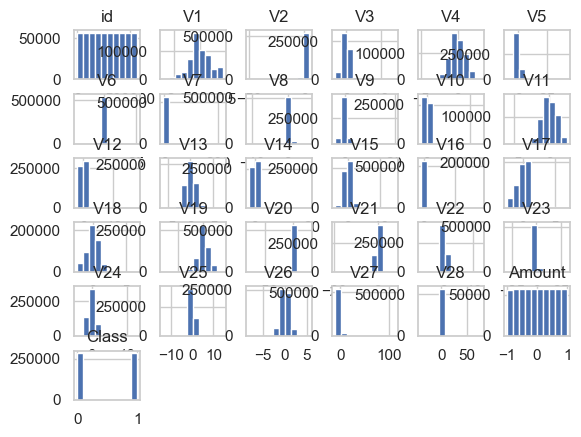

In [10]:
# histogram
data.hist()
plt.show()

In [11]:
# remove id 
data.drop("id",axis=1,inplace=True)
data["Class"].unique()

array([0, 1], dtype=int64)

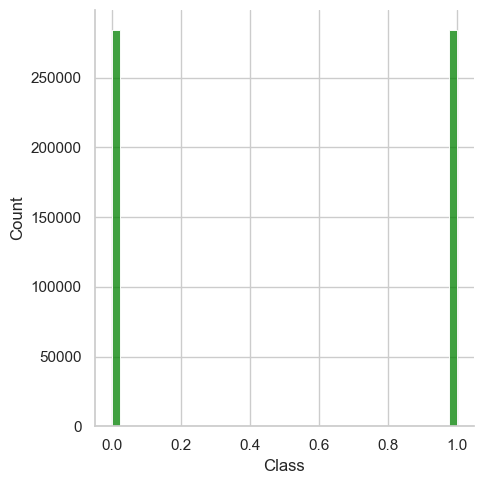

In [12]:
# visualization of class
sns.displot(data['Class'],color='green')
plt.show()

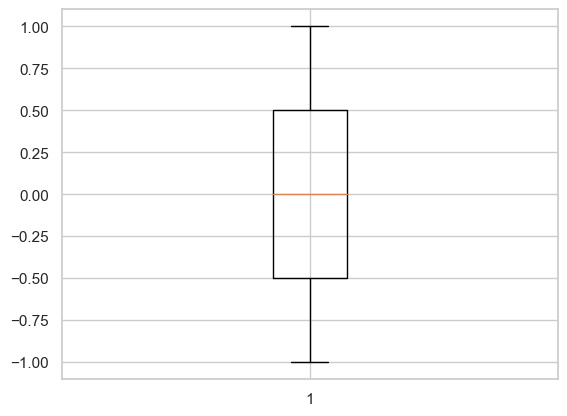

In [13]:
# visualization of amount
plt.boxplot(data["Amount"])
plt.show()

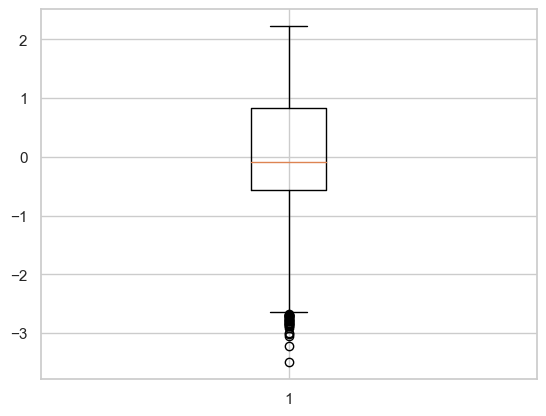

In [15]:
# visualization  of v1
plt.boxplot(data["V1"])
plt.show()

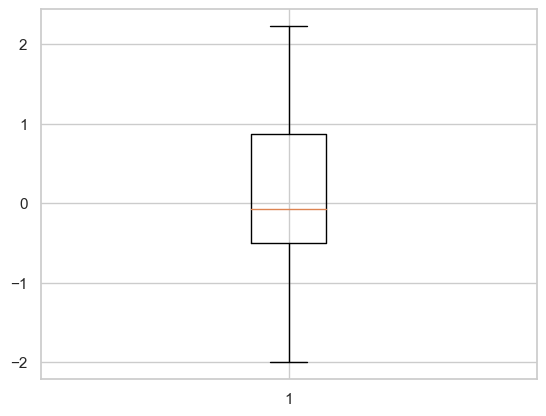

In [16]:
# there are outliers
#(df['stem-height'] > 10 ).sum()
data=data[(data['V1'] > -2)]
plt.boxplot(data['V1'])

plt.show()

In [17]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

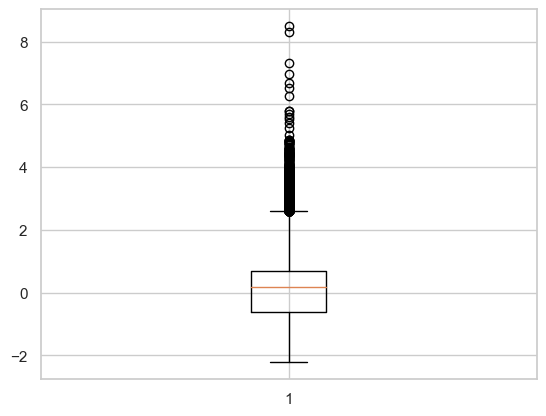

In [18]:
plt.boxplot(data['V16'])

plt.show();


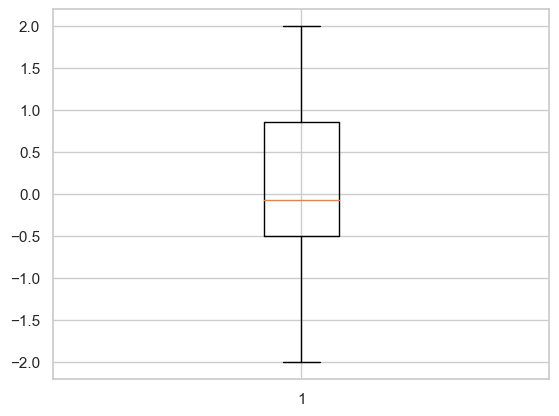

In [19]:
data= data[(data['V1'] < 2)]
plt.boxplot(data['V1'])

plt.show();

### Visualization

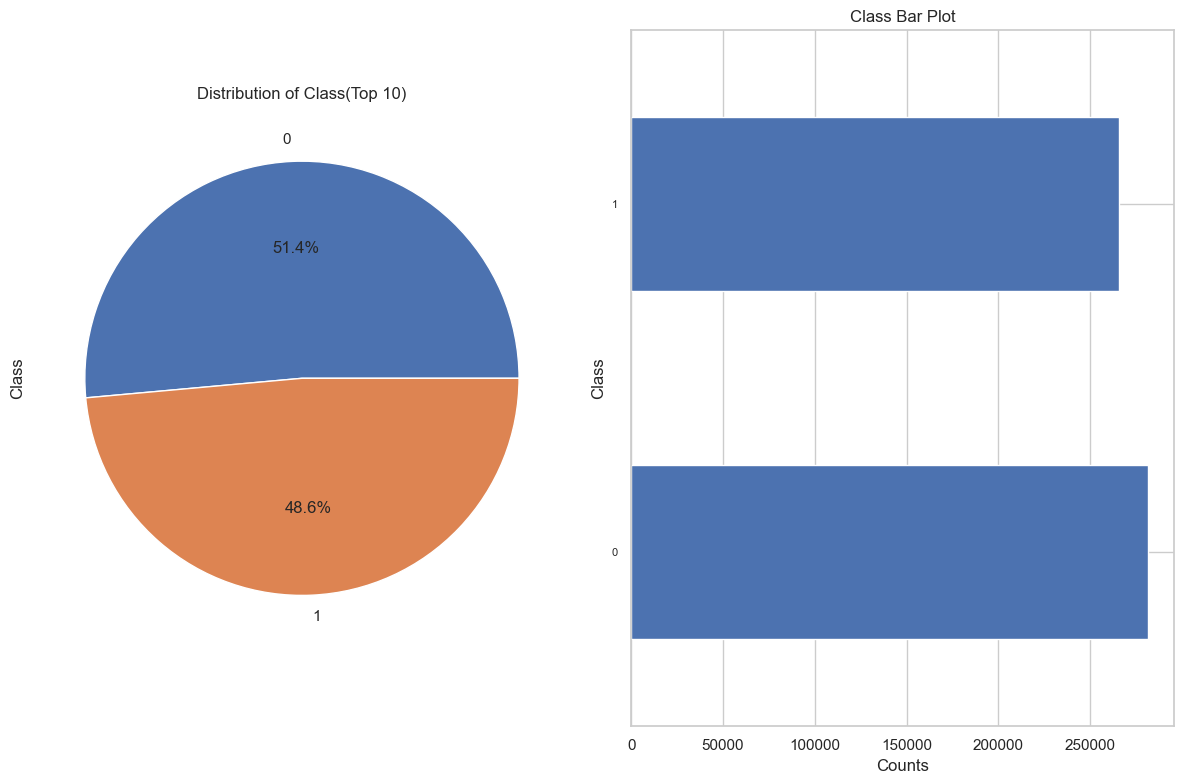

In [20]:
count_top10=data['Class'].value_counts().head()
fig,axes=plt.subplots(1,2,figsize=(12,8))
count_top10.plot.pie(autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('Distribution of Class(Top 10)')
count_top10.plot.barh(ax=axes[1])
axes[1].set_title('Class Bar Plot')
axes[1].set_ylabel('Class')
axes[1].set_xlabel('Counts')
axes[1].tick_params(axis='y',labelsize=8)
plt.tight_layout()
plt.show()

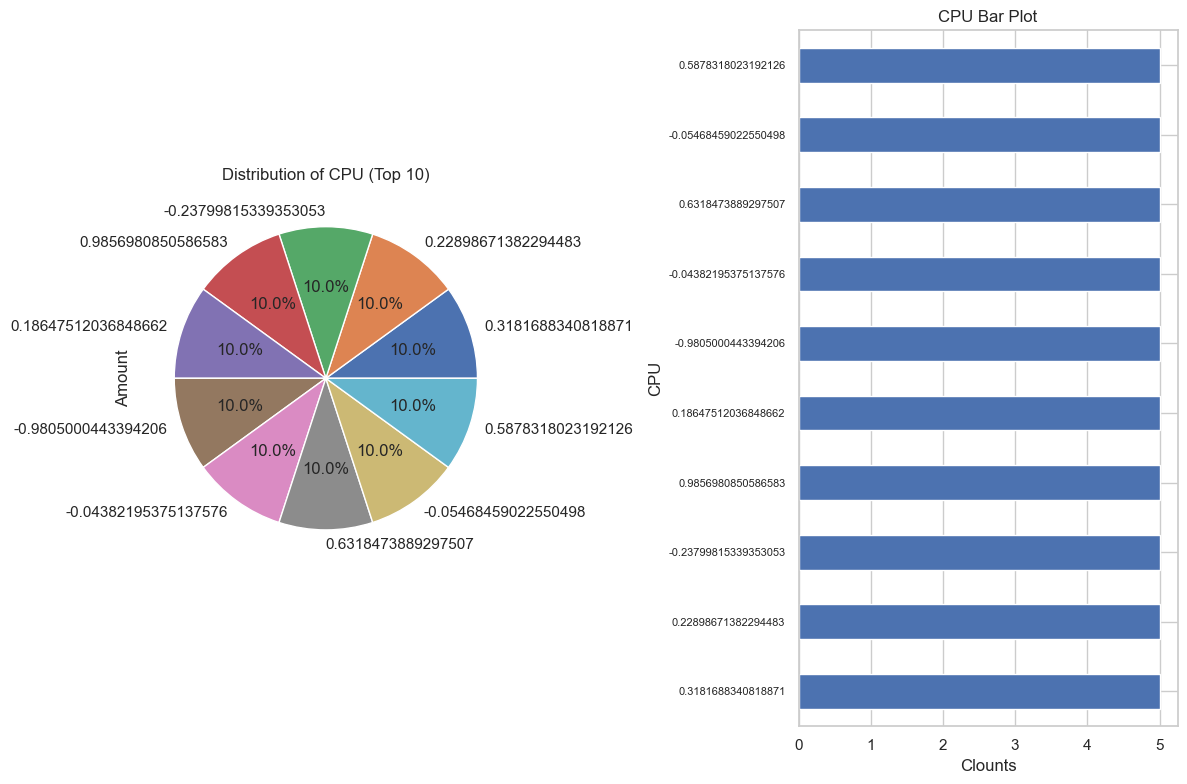

In [22]:
cpu_top10=data['Amount'].value_counts().head(10)
fig,axes=plt.subplots(1,2,figsize=(12,8))
cpu_top10.plot.pie(autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('Distribution of CPU (Top 10)')
cpu_top10.plot.barh(ax=axes[1])
axes[1].set_title('CPU Bar Plot')
axes[1].set_ylabel('CPU')
axes[1].set_xlabel('Clounts')
axes[1].tick_params(axis='y',labelsize=8)
plt.tight_layout()
plt.show()

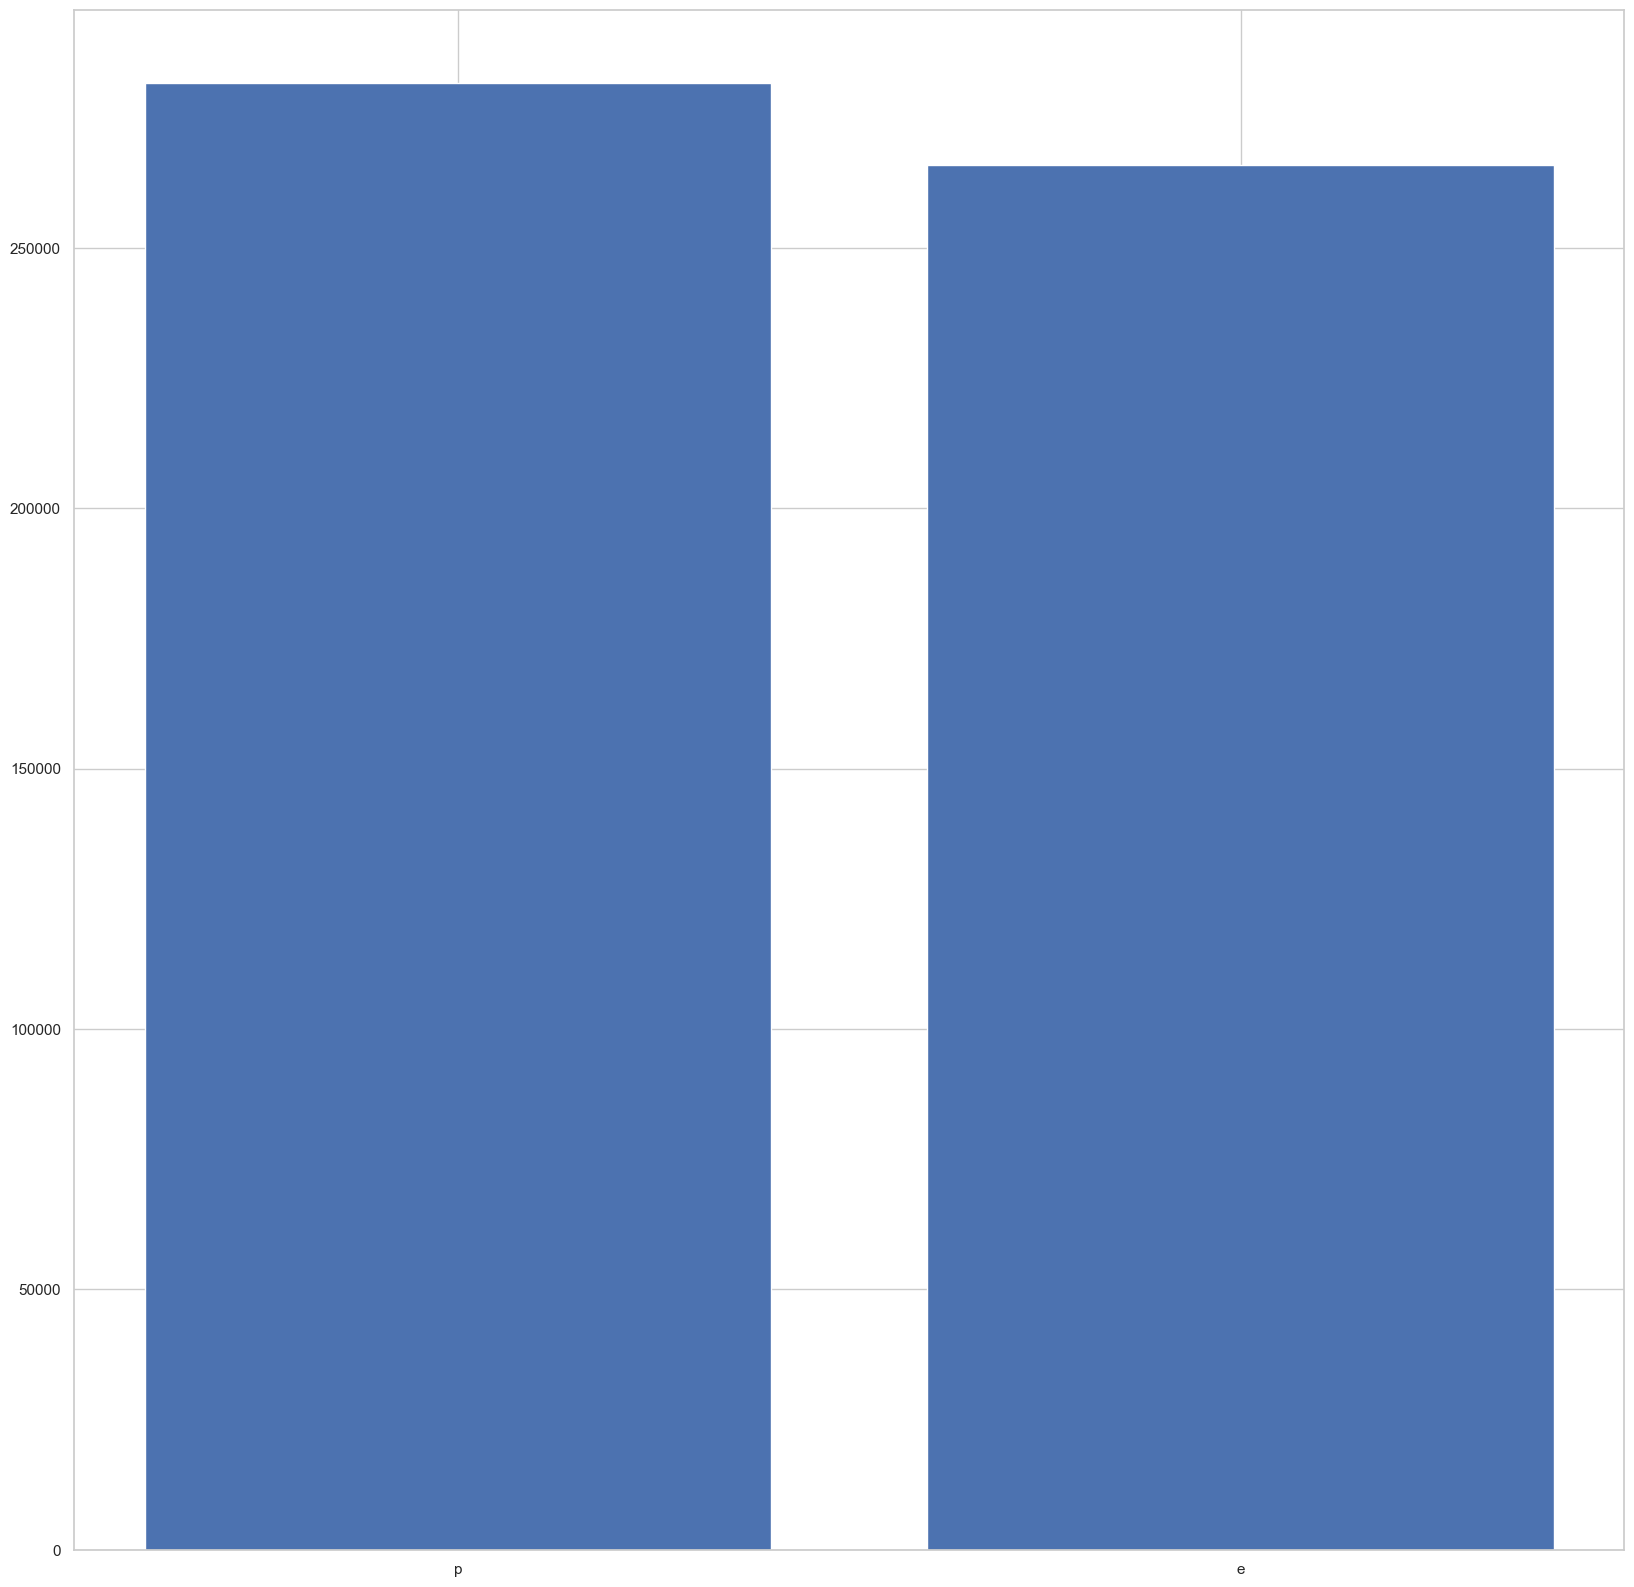

In [24]:
plt.figure(figsize=(20,20))
plt.bar(['p','e'], data['Class'].value_counts())
plt.show()

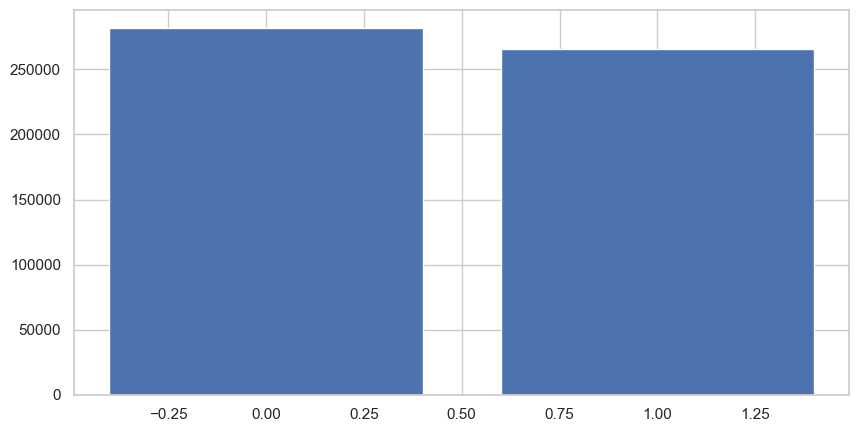

In [25]:
plt.figure(figsize=(10,5))
plt.bar(data['Class'].value_counts().index,data['Class'].value_counts())
plt.show()


In [27]:
# split dataset into x,y
x=data.drop("Class",axis="columns")
y=data["Class"]
y.head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 547552, dtype: int64>

### MinMax Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()

x_scaler_minMax = my_scaler.fit_transform(x)

### Gaussian nb model

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler_minMax,y,test_size=0.25,random_state=42,stratify=y)

In [30]:
print("x_train = ",x_train.shape ," y_train = ", y_train.shape)
print("x_test  = ",x_test.shape ," y_test  = ", y_test.shape)

x_train =  (410664, 29)  y_train =  (410664,)
x_test  =  (136888, 29)  y_test  =  (136888,)


In [31]:
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(x_train,y_train)
print('NBModel Train Score is : ',NBModel.score(x_train,y_train))
print('NBModel Test Score is : ',NBModel.score(x_test,y_test))

NBModel Train Score is :  0.918967817972844
NBModel Test Score is :  0.918020571562153


In [32]:
y_pred=NBModel.predict(x_test)
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [1, 1, 0, 1, 1]
predict output :  [0, 1, 0, 1, 1]


[[68697  1716]
 [ 9506 56969]]


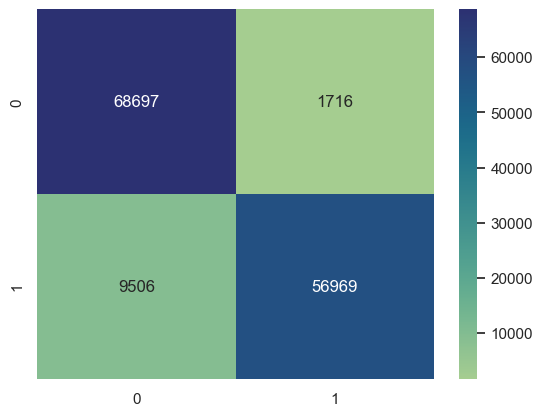

In [33]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     70413
           1       0.97      0.86      0.91     66475

    accuracy                           0.92    136888
   macro avg       0.92      0.92      0.92    136888
weighted avg       0.92      0.92      0.92    136888



### Decision tree model

In [35]:
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier(criterion='entropy') #'log_loss', 'entropy', 'gini'
DTModel.fit(x_train,y_train)
print('DTModel Train Score is : ',DTModel.score(x_train,y_train))
print('DTModel Test Score is : ',DTModel.score(x_test,y_test))

DTModel Train Score is :  1.0
DTModel Test Score is :  0.9982905733154112


In [36]:
y_pred=NBModel.predict(x_test)
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [1, 1, 0, 1, 1]
predict output :  [0, 1, 0, 1, 1]


[[68697  1716]
 [ 9506 56969]]


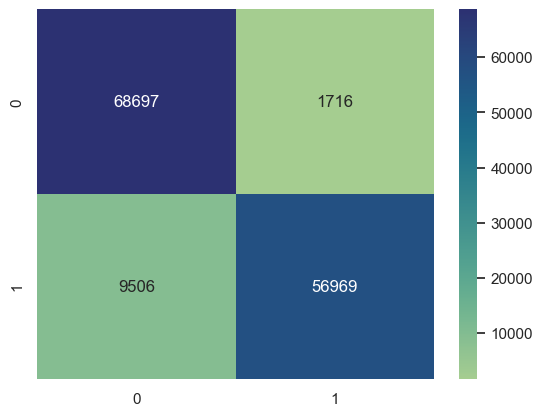

In [37]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [38]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.98      0.92     70413
           1       0.97      0.86      0.91     66475

    accuracy                           0.92    136888
   macro avg       0.92      0.92      0.92    136888
weighted avg       0.92      0.92      0.92    136888



### Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [40]:
print('Accuracy of Train : ',classifier.score(x_train, y_train))
print('Accuracy of Test : ',classifier.score(x_test, y_test))

Accuracy of Train :  0.9611409814349444
Accuracy of Test :  0.9609680907018877


In [42]:
y_pred=NBModel.predict(x_test)
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [1, 1, 0, 1, 1]
predict output :  [0, 1, 0, 1, 1]


[[68697  1716]
 [ 9506 56969]]


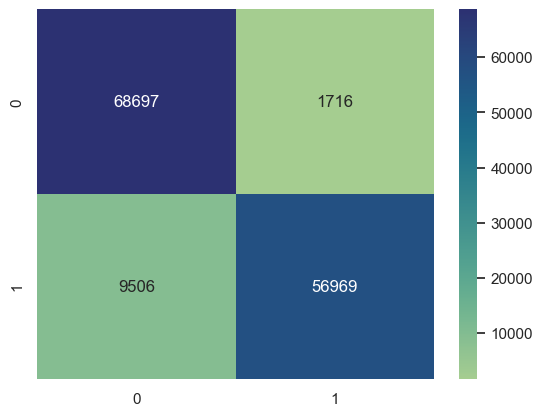

In [43]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     70413
           1       0.97      0.86      0.91     66475

    accuracy                           0.92    136888
   macro avg       0.92      0.92      0.92    136888
weighted avg       0.92      0.92      0.92    136888

